#### Passos:

Data prep:
- Analisar a Base; OK
- Normalizar/Padronizar; OK 
- Tratar variáveis categóricas;OK

Parametrização:
- Fazer o metodo de escolha de clusters OK
    - Elbow OK
    - SilhuetaOK
    
Implementação de Algortimos:
- Implementar o kmeans OK 
    - Validar a consistência do agrupamento OK

- Implementar kmeans passando os pontos do centroid ok
    - Validar a consistência do agrupamento ok
    - Validar a diferença de grupos do kmeans para o kmeans com os pontos do centroide ok

- Implementar o Kmeans ++ ok
    - Validar a consistência do agrupamento ok
    - Validar a diferença de grupos do kmeans para o kmeans com os pontos do centroide e Kmeans ++ ok

- Implementar o Kmedians
    - Validar a consistência do agrupamento
    - Validar a diferença de grupos do kmeans para o kmeans com os pontos do centroide e Kmeans ++ e kmedians

- Implementar o Kmedoids
    - Validar a consistência do agrupamento
    - Validar a diferença de grupos do kmeans para o kmeans com os pontos do centroide e Kmeans ++ e kmedians e kmedoids

- Implementar o Bisect Kmeans
    - Validar a consistência do agrupamento
    - Validar a diferença de grupos do kmeans para o kmeans com os pontos do centroide e Kmeans ++ e kmedians e kmedoids e BisectKmeans

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_score,davies_bouldin_score,calinski_harabasz_score
from yellowbrick.cluster import SilhouetteVisualizer
import numpy as np
%matplotlib inline
pd.set_option("display.max_columns",None)

In [4]:
pip install scikit-learn-extra

Note: you may need to restart the kernel to use updated packages.


In [5]:
base_full = pd.read_excel('C:\\Users\\flavi\\Google Drive\\Estudos\\Formação em Data Science\\Agrupamento\\Bases\\default of credit card clients.xls')
base_full.head()

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1      20000    2          2         1   24      2      2     -1     -1   
1   2     120000    2          2         2   26     -1      2      0      0   
2   3      90000    2          2         2   34      0      0      0      0   
3   4      50000    2          2         1   37      0      0      0      0   
4   5      50000    1          2         1   57     -1      0     -1      0   

   PAY_5  PAY_6  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  \
0     -2     -2       3913       3102        689          0          0   
1      0      2       2682       1725       2682       3272       3455   
2      0      0      29239      14027      13559      14331      14948   
3      0      0      46990      48233      49291      28314      28959   
4      0      0       8617       5670      35835      20940      19146   

   BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  \
0          0         0       689         0         0         0         0   
1       3261         0      1000      1000      1000         0      2000   
2      15549      1518      1500      1000      1000      1000      5000   
3      29547      2000      2019      1200      1100      1069      1000   
4      19131      2000     36681     10000      9000       689       679   

   default payment next month  
0                           1  
1                           1  
2                           0  
3                           0  
4                           0

# Descrição da Base
- Limit_Bal = Valor do crédito concedido (dólar NT): inclui tanto o crédito ao consumidor individual quanto o crédito familiar (suplementar).
- Sex = 1 = Homem 2 = Mulher
- Education (1 = graduate school; 2 = university; 3 = high school; 4 = others)
- Age (year)
- Pay_0 até Pay_6 = Histórico de pagamentos anteriores. Rastreamos os registros de pagamentos mensais anteriores (de abril a setembro de 2005) da seguinte forma: X6 = o status de reembolso em setembro de 2005; X7 = situação de amortização em agosto de 2005; . . .; X11 = estado de reembolso em abril de 2005. A escala de medição para o estado de reembolso é: -1 = pagamento em dia; 1 = atraso no pagamento por um mês; 2 = atraso no pagamento por dois meses; . . .; 8 = atraso no pagamento por oito meses; 9 = atraso no pagamento de nove meses ou mais.
- Bill_AMT até Bill_AMT6 = Valor da fatura (dólar NT). X12 = valor da fatura em setembro de 2005; X13 = valor da fatura em agosto de 2005; . . .; X17 = valor da fatura em abril de 2005.
- Pay_AMT1 até Pay_AMT6 = Valor do pagamento anterior (dólar NT). X18 = valor pago em setembro de 2005; X19 = valor pago em agosto de 2005; . . .; X23 = valor pago em abril de 2005.

In [6]:
#Data Prep:
    #- Somar o valor total do historico dos boletos Bill_AMT até Bill_AMT6
    #- Somar o valor total do pagamento dos respectivos Boletos  Pay_AMT1 até Pay_AMT6
    #- Dropar a tabela default payment next month
    #- Dropar totas as tabelas apos a soma
    
base_full['All_BILL_sum'] = base_full['BILL_AMT1']+base_full['BILL_AMT2']+base_full['BILL_AMT3']+base_full['BILL_AMT4']+base_full['BILL_AMT5']+base_full['BILL_AMT6']
base_full['All_PAY_sum']= base_full['PAY_AMT1']+base_full['PAY_AMT2']+base_full['PAY_AMT3']+base_full['PAY_AMT4']+base_full['PAY_AMT5']+base_full['PAY_AMT6'] 
base_full.drop(['ID','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6','default payment next month'], axis=1, inplace=True)
base_full.head()

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0      20000    2          2         1   24      2      2     -1     -1   
1     120000    2          2         2   26     -1      2      0      0   
2      90000    2          2         2   34      0      0      0      0   
3      50000    2          2         1   37      0      0      0      0   
4      50000    1          2         1   57     -1      0     -1      0   

   PAY_5  PAY_6  All_BILL_sum  All_PAY_sum  
0     -2     -2          7704          689  
1      0      2         17077         5000  
2      0      0        101653        11018  
3      0      0        231334         8388  
4      0      0        109339        59049

In [7]:
base_full.describe()

LIMIT_BAL           SEX     EDUCATION      MARRIAGE           AGE  \
count    30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean    167484.322667      1.603733      1.853133      1.551867     35.485500   
std     129747.661567      0.489129      0.790349      0.521970      9.217904   
min      10000.000000      1.000000      0.000000      0.000000     21.000000   
25%      50000.000000      1.000000      1.000000      1.000000     28.000000   
50%     140000.000000      2.000000      2.000000      2.000000     34.000000   
75%     240000.000000      2.000000      2.000000      2.000000     41.000000   
max    1000000.000000      2.000000      6.000000      3.000000     79.000000   

              PAY_0         PAY_2         PAY_3         PAY_4         PAY_5  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      -0.016700     -0.133767     -0.166200     -0.220667     -0.266200   
std        1.123802      1.197186      1.196868      1.169139      1.133187   
min       -2.000000     -2.000000     -2.000000     -2.000000     -2.000000   
25%       -1.000000     -1.000000     -1.000000     -1.000000     -1.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        8.000000      8.000000      8.000000      8.000000      8.000000   

              PAY_6  All_BILL_sum   All_PAY_sum  
count  30000.000000  3.000000e+04  3.000000e+04  
mean      -0.291100  2.698617e+05  3.165139e+04  
std        1.149988  3.795643e+05  6.082768e+04  
min       -2.000000 -3.362590e+05  0.000000e+00  
25%       -1.000000  2.868800e+04  6.679750e+03  
50%        0.000000  1.263110e+05  1.438300e+04  
75%        0.000000  3.426265e+05  3.350350e+04  
max        8.000000  5.263883e+06  3.764066e+06

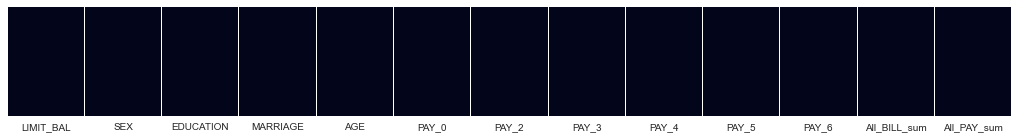

In [8]:
plt.figure(figsize=(18,2))
sns.heatmap(base_full.isnull(), cbar=False, yticklabels=False);

In [9]:
base_full.isnull().sum()

LIMIT_BAL       0
SEX             0
EDUCATION       0
MARRIAGE        0
AGE             0
PAY_0           0
PAY_2           0
PAY_3           0
PAY_4           0
PAY_5           0
PAY_6           0
All_BILL_sum    0
All_PAY_sum     0
dtype: int64

In [10]:
def standarscaler(df, lista):
    stderscaler = StandardScaler()
    for item in lista:
        df[[item]] = stderscaler.fit_transform(df[[item]])
    return df

In [11]:
#lista = ['LIMIT_BAL','AGE','All_BILL_sum','All_PAY_sum']
lista = ['LIMIT_BAL','SEX','EDUCATION','MARRIAGE','AGE','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','All_BILL_sum','All_PAY_sum']
df_result_StandScaler = standarscaler(base_full,lista)
df_result_StandScaler

LIMIT_BAL       SEX  EDUCATION  MARRIAGE       AGE     PAY_0     PAY_2  \
0      -1.136720  0.810161   0.185828 -1.057295 -1.246020  1.794564  1.782348   
1      -0.365981  0.810161   0.185828  0.858557 -1.029047 -0.874991  1.782348   
2      -0.597202  0.810161   0.185828  0.858557 -0.161156  0.014861  0.111736   
3      -0.905498  0.810161   0.185828 -1.057295  0.164303  0.014861  0.111736   
4      -0.905498 -1.234323   0.185828 -1.057295  2.334029 -0.874991  0.111736   
...          ...       ...        ...       ...       ...       ...       ...   
29995   0.404759 -1.234323   1.451114 -1.057295  0.381275  0.014861  0.111736   
29996  -0.134759 -1.234323   1.451114  0.858557  0.815221 -0.874991 -0.723570   
29997  -1.059646 -1.234323   0.185828  0.858557  0.164303  3.574267  2.617654   
29998  -0.674276 -1.234323   1.451114 -1.057295  0.598248  0.904712 -0.723570   
29999  -0.905498 -1.234323   0.185828 -1.057295  1.140680  0.014861  0.111736   

          PAY_3     PAY_4     PAY_5     PAY_6  All_BILL_sum  All_PAY_sum  
0     -0.696663 -0.666599 -1.530046 -1.486041     -0.690692    -0.509027  
1      0.138865  0.188746  0.234917  1.992316     -0.665997    -0.438153  
2      0.138865  0.188746  0.234917  0.253137     -0.443170    -0.339216  
3      0.138865  0.188746  0.234917  0.253137     -0.101507    -0.382454  
4     -0.696663  0.188746  0.234917  0.253137     -0.422920     0.450421  
...         ...       ...       ...       ...           ...          ...  
29995  0.138865  0.188746  0.234917  0.253137      1.200047     0.179175  
29996 -0.696663 -0.666599  0.234917  0.253137     -0.655182    -0.282136  
29997  1.809921 -0.666599  0.234917  0.253137     -0.525257    -0.005777  
29998  0.138865  0.188746  0.234917 -0.616452     -0.008564     1.899325  
29999  0.138865  0.188746  0.234917  0.253137     -0.102719    -0.383769  

[30000 rows x 13 columns]

In [12]:
base_full.describe()

LIMIT_BAL           SEX     EDUCATION      MARRIAGE           AGE  \
count  3.000000e+04  3.000000e+04  3.000000e+04  3.000000e+04  3.000000e+04   
mean   2.436569e-17 -1.597606e-14  5.569768e-15 -2.564186e-15 -7.286024e-17   
std    1.000017e+00  1.000017e+00  1.000017e+00  1.000017e+00  1.000017e+00   
min   -1.213794e+00 -1.234323e+00 -2.344743e+00 -2.973147e+00 -1.571479e+00   
25%   -9.054983e-01 -1.234323e+00 -1.079457e+00 -1.057295e+00 -8.120745e-01   
50%   -2.118326e-01  8.101607e-01  1.858283e-01  8.585573e-01 -1.611565e-01   
75%    5.589071e-01  8.101607e-01  1.858283e-01  8.585573e-01  5.982479e-01   
max    6.416528e+00  8.101607e-01  5.246970e+00  2.774410e+00  4.720729e+00   

              PAY_0         PAY_2         PAY_3         PAY_4         PAY_5  \
count  3.000000e+04  3.000000e+04  3.000000e+04  3.000000e+04  3.000000e+04   
mean  -7.559566e-17 -1.586202e-15 -1.135055e-16 -3.630355e-15 -7.266021e-16   
std    1.000017e+00  1.000017e+00  1.000017e+00  1.000017e+00  1.000017e+00   
min   -1.764843e+00 -1.558876e+00 -1.532192e+00 -1.521944e+00 -1.530046e+00   
25%   -8.749911e-01 -7.235699e-01 -6.966635e-01 -6.665987e-01 -6.475648e-01   
50%    1.486052e-02  1.117361e-01  1.388648e-01  1.887461e-01  2.349165e-01   
75%    1.486052e-02  1.117361e-01  1.388648e-01  1.887461e-01  2.349165e-01   
max    7.133674e+00  6.794184e+00  6.823091e+00  7.031505e+00  7.294767e+00   

              PAY_6  All_BILL_sum   All_PAY_sum  
count  3.000000e+04  3.000000e+04  3.000000e+04  
mean  -4.965398e-15 -9.278134e-17  1.354139e-16  
std    1.000017e+00  1.000017e+00  1.000017e+00  
min   -1.486041e+00 -1.596912e+00 -5.203539e-01  
25%   -6.164517e-01 -6.354066e-01 -4.105378e-01  
50%    2.531374e-01 -3.782048e-01 -2.838951e-01  
75%    2.531374e-01  1.917094e-01  3.044894e-02  
max    7.209850e+00  1.315747e+01  6.136149e+01

In [47]:
# Metodo Helbo de 1 a 6
def Elbow(df):
        wcss = []
        for i in range(1, 6):
            kmeans = KMeans(n_clusters=i, random_state=42)
            kmeans.fit(df)
            wcss.append(kmeans.inertia_)
        plt.plot(range(1, 6), wcss)
        plt.title('Método Elbow')
        plt.xlabel('Numero de  clusters')
        plt.ylabel('WCSS')
        plt.show()

In [48]:
Elbow(df_result_StandScaler)

In [49]:
# Metodo da silhueta
def Silhueta(df):
    silhouette_scores = []

    for k in range(2, 11):
        model2 = KMeans(n_clusters=k, random_state=42)
        model2.fit(df)
        score = silhouette_score(df, model2.labels_)
        print("Silhouette Score for k = ", k, "is", score)
        silhouette_scores.append(score)
    
    plt.plot(range(2, 11), silhouette_scores, marker='o')
    plt.xlabel('Number of clusters (K)')
    plt.ylabel('Silhouette score')
    plt.savefig('silhouette plot.png')

In [50]:
Silhueta(df_result_StandScaler)

Silhouette Score for k =  2 is 0.19786915572187452
Silhouette Score for k =  3 is 0.18451385595136596
Silhouette Score for k =  4 is 0.1825650876945134
Silhouette Score for k =  5 is 0.15738960427774315
Silhouette Score for k =  6 is 0.16276016447874478
Silhouette Score for k =  7 is 0.14837360738563032
Silhouette Score for k =  8 is 0.14043967800431356
Silhouette Score for k =  9 is 0.14281694439844284
Silhouette Score for k =  10 is 0.1490823926956768


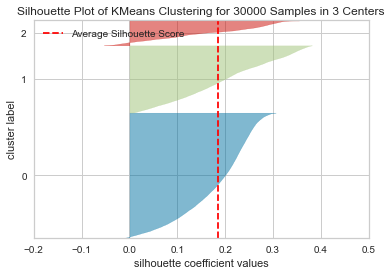

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 30000 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [51]:
model2=KMeans(n_clusters=3, random_state=42)
visual_silhueta = SilhouetteVisualizer(model2, colors='yellowbrick')
visual_silhueta.fit(df_result_StandScaler)
visual_silhueta.show()

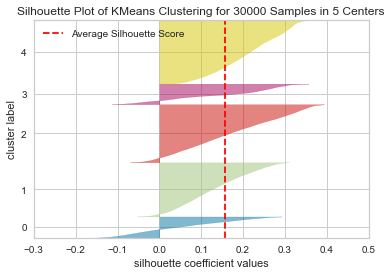

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 30000 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [52]:
model2=KMeans(n_clusters=5, random_state=42)
visual_silhueta = SilhouetteVisualizer(model2, colors='yellowbrick')
visual_silhueta.fit(df_result_StandScaler)
visual_silhueta.show()

In [53]:
modelo_final = KMeans(n_clusters=5, random_state=42)
result_cluester_KMeans = modelo_final.fit_predict(df_result_StandScaler)
result_cluester_KMeans

array([1, 4, 4, ..., 3, 1, 1])

In [54]:
df_result_StandScaler['Labels_Kmens'] = result_cluester_KMeans

In [55]:
df_result_StandScaler.head()

LIMIT_BAL       SEX  EDUCATION  MARRIAGE       AGE     PAY_0     PAY_2  \
0  -1.136720  0.810161   0.185828 -1.057295 -1.246020  1.794564  1.782348   
1  -0.365981  0.810161   0.185828  0.858557 -1.029047 -0.874991  1.782348   
2  -0.597202  0.810161   0.185828  0.858557 -0.161156  0.014861  0.111736   
3  -0.905498  0.810161   0.185828 -1.057295  0.164303  0.014861  0.111736   
4  -0.905498 -1.234323   0.185828 -1.057295  2.334029 -0.874991  0.111736   

      PAY_3     PAY_4     PAY_5     PAY_6  All_BILL_sum  All_PAY_sum  \
0 -0.696663 -0.666599 -1.530046 -1.486041     -0.690692    -0.509027   
1  0.138865  0.188746  0.234917  1.992316     -0.665997    -0.438153   
2  0.138865  0.188746  0.234917  0.253137     -0.443170    -0.339216   
3  0.138865  0.188746  0.234917  0.253137     -0.101507    -0.382454   
4 -0.696663  0.188746  0.234917  0.253137     -0.422920     0.450421   

   Labels_Kmens  
0             1  
1             4  
2             4  
3             1  
4             1

<AxesSubplot:xlabel='n', ylabel='perc'>

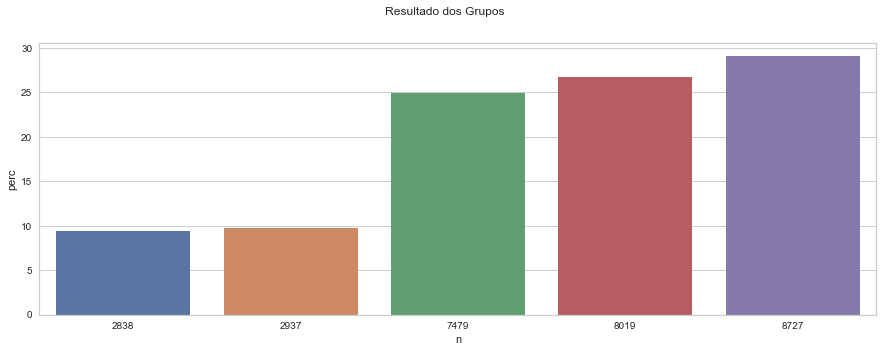

In [56]:
df_result = pd.DataFrame({'values': df_result_StandScaler.Labels_Kmens.unique(), 'n': df_result_StandScaler.Labels_Kmens.value_counts().unique(), 'perc':  round((df_result_StandScaler.Labels_Kmens.value_counts() /df_result_StandScaler.Labels_Kmens.shape[0]) * 100, 3)})

fig, axes = plt.subplots(1, 1, figsize=(15, 5), sharey=True)
fig.suptitle('Resultado dos Grupos')

sns.barplot(x=df_result.n, y=df_result.perc,palette='deep')


In [57]:
df_result_StandScaler[df_result_StandScaler['Labels_Kmens']==0].head()

LIMIT_BAL       SEX  EDUCATION  MARRIAGE       AGE     PAY_0     PAY_2  \
6    2.562830 -1.234323  -1.079457  0.858557 -0.703588  0.014861  0.111736   
17   1.175499 -1.234323  -1.079457 -1.057295  1.466139  0.014861  0.111736   
36   0.867203 -1.234323   0.185828 -1.057295  0.489762  0.014861  0.111736   
40   1.483795 -1.234323  -1.079457  0.858557 -0.269643  0.014861  0.111736   
59   1.792091  0.810161   0.185828 -1.057295 -0.703588  0.014861  0.111736   

       PAY_3     PAY_4     PAY_5     PAY_6  All_BILL_sum  All_PAY_sum  \
6   0.138865  0.188746  0.234917  0.253137      6.467347     2.451353   
17  0.138865 -0.666599 -0.647565 -0.616452      1.834113     5.429290   
36  0.138865  0.188746  0.234917  0.253137      2.108019     0.168867   
40  0.138865  0.188746  0.234917  0.253137      3.638151     3.488414   
59  0.138865  0.188746  0.234917  0.253137      5.306905     1.272100   

    Labels_Kmens  
6              0  
17             0  
36             0  
40             0  
59             0

In [58]:
df_result_StandScaler[df_result_StandScaler['Labels_Kmens']==1].head()

LIMIT_BAL       SEX  EDUCATION  MARRIAGE       AGE     PAY_0     PAY_2  \
0   -1.136720  0.810161   0.185828 -1.057295 -1.246020  1.794564  1.782348   
3   -0.905498  0.810161   0.185828 -1.057295  0.164303  0.014861  0.111736   
4   -0.905498 -1.234323   0.185828 -1.057295  2.334029 -0.874991  0.111736   
8   -0.211833  0.810161   1.451114 -1.057295 -0.812074  0.014861  0.111736   
28  -0.905498  0.810161   1.451114 -1.057295  1.249166 -0.874991 -0.723570   

       PAY_3     PAY_4     PAY_5     PAY_6  All_BILL_sum  All_PAY_sum  \
0  -0.696663 -0.666599 -1.530046 -1.486041     -0.690692    -0.509027   
3   0.138865  0.188746  0.234917  0.253137     -0.101507    -0.382454   
4  -0.696663  0.188746  0.234917  0.253137     -0.422920     0.450421   
8   1.809921  0.188746  0.234917  0.253137     -0.539179    -0.409202   
28 -0.696663 -0.666599 -0.647565 -0.616452     -0.605056     0.130134   

    Labels_Kmens  
0              1  
3              1  
4              1  
8              1  
28             1

Calinski-Harabasz Index:
- as the Variance Ratio Criterion, is the ratio of the sum of between-clusters dispersion and of inter-cluster dispersion for all clusters, the higher the score , the better the performances. The score is higher when clusters are dense and well separated

Davies-Bouldin Index:
- Este índice significa a "similaridade" média entre os clusters, onde a similaridade é uma medida que compara a distância entre os clusters com o tamanho dos próprios clusters. Um índice Davies-Bouldin mais baixo está   relacionado a um modelo com melhor separação entre os clusters


In [59]:
# resultados para agrupamento inicial - kmeans puro
print('Calinski-Harabasz Index = ',davies_bouldin_score(df_result_StandScaler.iloc[:, 0:13], np.ravel(df_result_StandScaler.iloc[:, 13:14])))
print('Davies-Bouldin Inde= ',calinski_harabasz_score(df_result_StandScaler.iloc[:, 0:13], np.ravel(df_result_StandScaler.iloc[:, 13:14])))

Calinski-Harabasz Index =  1.7507418939017392
Davies-Bouldin Inde=  5130.216176963901


### K means passando como centroides inicais

In [60]:
df_result_StandScaler2 = df_result_StandScaler.drop(['Labels_Kmens'], axis=1)
df_result_StandScaler2.head()

LIMIT_BAL       SEX  EDUCATION  MARRIAGE       AGE     PAY_0     PAY_2  \
0  -1.136720  0.810161   0.185828 -1.057295 -1.246020  1.794564  1.782348   
1  -0.365981  0.810161   0.185828  0.858557 -1.029047 -0.874991  1.782348   
2  -0.597202  0.810161   0.185828  0.858557 -0.161156  0.014861  0.111736   
3  -0.905498  0.810161   0.185828 -1.057295  0.164303  0.014861  0.111736   
4  -0.905498 -1.234323   0.185828 -1.057295  2.334029 -0.874991  0.111736   

      PAY_3     PAY_4     PAY_5     PAY_6  All_BILL_sum  All_PAY_sum  
0 -0.696663 -0.666599 -1.530046 -1.486041     -0.690692    -0.509027  
1  0.138865  0.188746  0.234917  1.992316     -0.665997    -0.438153  
2  0.138865  0.188746  0.234917  0.253137     -0.443170    -0.339216  
3  0.138865  0.188746  0.234917  0.253137     -0.101507    -0.382454  
4 -0.696663  0.188746  0.234917  0.253137     -0.422920     0.450421

In [61]:
CentroidsInit =np.array( df_result_StandScaler2.loc[0:4])
CentroidsInit

array([[-1.13672015,  0.81016074,  0.18582826, -1.05729503, -1.24601985,
         1.79456386,  1.78234817, -0.69666346, -0.66659873, -1.53004603,
        -1.48604076, -0.69069198, -0.50902664],
       [-0.3659805 ,  0.81016074,  0.18582826,  0.85855728, -1.02904717,
        -0.87499115,  1.78234817,  0.1388648 ,  0.18874609,  0.23491652,
         1.99231551, -0.66599747, -0.43815312],
       [-0.59720239,  0.81016074,  0.18582826,  0.85855728, -0.16115646,
         0.01486052,  0.1117361 ,  0.1388648 ,  0.18874609,  0.23491652,
         0.25313738, -0.44316987, -0.33921624],
       [-0.90549825,  0.81016074,  0.18582826, -1.05729503,  0.16430256,
         0.01486052,  0.1117361 ,  0.1388648 ,  0.18874609,  0.23491652,
         0.25313738, -0.10150668, -0.38245386],
       [-0.90549825, -1.23432296,  0.18582826, -1.05729503,  2.33402934,
        -0.87499115,  0.1117361 , -0.69666346,  0.18874609,  0.23491652,
         0.25313738, -0.42292   ,  0.45042101]])

In [62]:
modelK2 = KMeans(n_clusters=5,random_state=42,init=CentroidsInit,n_init=1)
result_cluester_KMeans_set_Centroids = modelK2.fit_predict(df_result_StandScaler2)
result_cluester_KMeans_set_Centroids

array([3, 2, 2, ..., 1, 3, 3])

In [63]:
df_result_StandScaler2['Labels_Kmens_Centroids_escolhido'] = result_cluester_KMeans_set_Centroids
df_result_StandScaler2.head()

LIMIT_BAL       SEX  EDUCATION  MARRIAGE       AGE     PAY_0     PAY_2  \
0  -1.136720  0.810161   0.185828 -1.057295 -1.246020  1.794564  1.782348   
1  -0.365981  0.810161   0.185828  0.858557 -1.029047 -0.874991  1.782348   
2  -0.597202  0.810161   0.185828  0.858557 -0.161156  0.014861  0.111736   
3  -0.905498  0.810161   0.185828 -1.057295  0.164303  0.014861  0.111736   
4  -0.905498 -1.234323   0.185828 -1.057295  2.334029 -0.874991  0.111736   

      PAY_3     PAY_4     PAY_5     PAY_6  All_BILL_sum  All_PAY_sum  \
0 -0.696663 -0.666599 -1.530046 -1.486041     -0.690692    -0.509027   
1  0.138865  0.188746  0.234917  1.992316     -0.665997    -0.438153   
2  0.138865  0.188746  0.234917  0.253137     -0.443170    -0.339216   
3  0.138865  0.188746  0.234917  0.253137     -0.101507    -0.382454   
4 -0.696663  0.188746  0.234917  0.253137     -0.422920     0.450421   

   Labels_Kmens_Centroids_escolhido  
0                                 3  
1                                 2  
2                                 2  
3                                 3  
4                                 3

In [64]:
##Avaliação com o Kmeans setando centroids inicias
print('Calinski-Harabasz Index = ',davies_bouldin_score(df_result_StandScaler2.iloc[:, 0:13], np.ravel(df_result_StandScaler2.iloc[:, 13:14])))
print('Davies-Bouldin Inde= ',calinski_harabasz_score(df_result_StandScaler2.iloc[:, 0:13], np.ravel(df_result_StandScaler2.iloc[:, 13:14])))

Calinski-Harabasz Index =  1.7509487102354686
Davies-Bouldin Inde=  5130.226765974965


In [65]:
result_df_compar = df_result_StandScaler
result_df_compar['Labels_Kmens_Centroids_escolhido'] = result_cluester_KMeans_set_Centroids
result_df_compar

LIMIT_BAL       SEX  EDUCATION  MARRIAGE       AGE     PAY_0     PAY_2  \
0      -1.136720  0.810161   0.185828 -1.057295 -1.246020  1.794564  1.782348   
1      -0.365981  0.810161   0.185828  0.858557 -1.029047 -0.874991  1.782348   
2      -0.597202  0.810161   0.185828  0.858557 -0.161156  0.014861  0.111736   
3      -0.905498  0.810161   0.185828 -1.057295  0.164303  0.014861  0.111736   
4      -0.905498 -1.234323   0.185828 -1.057295  2.334029 -0.874991  0.111736   
...          ...       ...        ...       ...       ...       ...       ...   
29995   0.404759 -1.234323   1.451114 -1.057295  0.381275  0.014861  0.111736   
29996  -0.134759 -1.234323   1.451114  0.858557  0.815221 -0.874991 -0.723570   
29997  -1.059646 -1.234323   0.185828  0.858557  0.164303  3.574267  2.617654   
29998  -0.674276 -1.234323   1.451114 -1.057295  0.598248  0.904712 -0.723570   
29999  -0.905498 -1.234323   0.185828 -1.057295  1.140680  0.014861  0.111736   

          PAY_3     PAY_4     PAY_5     PAY_6  All_BILL_sum  All_PAY_sum  \
0     -0.696663 -0.666599 -1.530046 -1.486041     -0.690692    -0.509027   
1      0.138865  0.188746  0.234917  1.992316     -0.665997    -0.438153   
2      0.138865  0.188746  0.234917  0.253137     -0.443170    -0.339216   
3      0.138865  0.188746  0.234917  0.253137     -0.101507    -0.382454   
4     -0.696663  0.188746  0.234917  0.253137     -0.422920     0.450421   
...         ...       ...       ...       ...           ...          ...   
29995  0.138865  0.188746  0.234917  0.253137      1.200047     0.179175   
29996 -0.696663 -0.666599  0.234917  0.253137     -0.655182    -0.282136   
29997  1.809921 -0.666599  0.234917  0.253137     -0.525257    -0.005777   
29998  0.138865  0.188746  0.234917 -0.616452     -0.008564     1.899325   
29999  0.138865  0.188746  0.234917  0.253137     -0.102719    -0.383769   

       Labels_Kmens  Labels_Kmens_Centroids_escolhido  
0                 1                                 3  
1                 4                                 2  
2                 4                                 2  
3                 1                                 3  
4                 1                                 3  
...             ...                               ...  
29995             1                                 3  
29996             1                                 3  
29997             3                                 1  
29998             1                                 3  
29999             1                                 3  

[30000 rows x 15 columns]

In [66]:
result_df_compar[(result_df_compar['Labels_Kmens']==4) & (result_df_compar['Labels_Kmens_Centroids_escolhido']==4)]

Empty DataFrame
Columns: [LIMIT_BAL, SEX, EDUCATION, MARRIAGE, AGE, PAY_0, PAY_2, PAY_3, PAY_4, PAY_5, PAY_6, All_BILL_sum, All_PAY_sum, Labels_Kmens, Labels_Kmens_Centroids_escolhido]
Index: []

### Kmeans utilizando o Kmeasn ++

In [67]:
df_result_StandScaler3 = df_result_StandScaler2.drop(['Labels_Kmens_Centroids_escolhido'], axis=1)
df_result_StandScaler3.head()

LIMIT_BAL       SEX  EDUCATION  MARRIAGE       AGE     PAY_0     PAY_2  \
0  -1.136720  0.810161   0.185828 -1.057295 -1.246020  1.794564  1.782348   
1  -0.365981  0.810161   0.185828  0.858557 -1.029047 -0.874991  1.782348   
2  -0.597202  0.810161   0.185828  0.858557 -0.161156  0.014861  0.111736   
3  -0.905498  0.810161   0.185828 -1.057295  0.164303  0.014861  0.111736   
4  -0.905498 -1.234323   0.185828 -1.057295  2.334029 -0.874991  0.111736   

      PAY_3     PAY_4     PAY_5     PAY_6  All_BILL_sum  All_PAY_sum  
0 -0.696663 -0.666599 -1.530046 -1.486041     -0.690692    -0.509027  
1  0.138865  0.188746  0.234917  1.992316     -0.665997    -0.438153  
2  0.138865  0.188746  0.234917  0.253137     -0.443170    -0.339216  
3  0.138865  0.188746  0.234917  0.253137     -0.101507    -0.382454  
4 -0.696663  0.188746  0.234917  0.253137     -0.422920     0.450421

In [69]:
model3 = KMeans(n_clusters=5,random_state=42, init='k-means++')
result_cluester_KMeans_plusplus = model3.fit_predict(df_result_StandScaler3)
result_cluester_KMeans_plusplus

array([1, 4, 4, ..., 3, 1, 1])

In [70]:
df_result_StandScaler3['Labels_Kmens_pluplus'] = result_cluester_KMeans_plusplus
df_result_StandScaler3.head()

LIMIT_BAL       SEX  EDUCATION  MARRIAGE       AGE     PAY_0     PAY_2  \
0  -1.136720  0.810161   0.185828 -1.057295 -1.246020  1.794564  1.782348   
1  -0.365981  0.810161   0.185828  0.858557 -1.029047 -0.874991  1.782348   
2  -0.597202  0.810161   0.185828  0.858557 -0.161156  0.014861  0.111736   
3  -0.905498  0.810161   0.185828 -1.057295  0.164303  0.014861  0.111736   
4  -0.905498 -1.234323   0.185828 -1.057295  2.334029 -0.874991  0.111736   

      PAY_3     PAY_4     PAY_5     PAY_6  All_BILL_sum  All_PAY_sum  \
0 -0.696663 -0.666599 -1.530046 -1.486041     -0.690692    -0.509027   
1  0.138865  0.188746  0.234917  1.992316     -0.665997    -0.438153   
2  0.138865  0.188746  0.234917  0.253137     -0.443170    -0.339216   
3  0.138865  0.188746  0.234917  0.253137     -0.101507    -0.382454   
4 -0.696663  0.188746  0.234917  0.253137     -0.422920     0.450421   

   Labels_Kmens_pluplus  
0                     1  
1                     4  
2                     4  
3                     1  
4                     1

In [71]:
# resultados para agrupamento inicial - kmeans ++
print('Calinski-Harabasz Index = ',davies_bouldin_score(df_result_StandScaler3.iloc[:, 0:13], np.ravel(df_result_StandScaler3.iloc[:, 13:14])))
print('Davies-Bouldin Inde= ',calinski_harabasz_score(df_result_StandScaler3.iloc[:, 0:13], np.ravel(df_result_StandScaler3.iloc[:, 13:14])))

Calinski-Harabasz Index =  1.7507418939017392
Davies-Bouldin Inde=  5130.216176963901
